<a href="https://colab.research.google.com/github/aliabbas217/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/363.4 MB 33.6 MB/s eta 0:00:08

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchmetrics
from torchmetrics.classification import Accuracy

ModuleNotFoundError: No module named 'torchmetrics'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
! kaggle datasets download saurabhshahane/twitter-sentiment-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 92% 7.00M/7.60M [00:00<00:00, 50.6MB/s]
100% 7.60M/7.60M [00:00<00:00, 53.9MB/s]


In [ ]:
!unzip "/content/twitter-sentiment-dataset.zip"

Archive:  /content/twitter-sentiment-dataset.zip
  inflating: Twitter_Data.csv        


In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv")

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df['category'] = df['category'].map(lambda x: 0 if x<0 else 1 if x > 0 else 2)

In [ ]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,2
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
...,...,...
162975,why these 456 crores paid neerav modi not reco...,0
162976,dear rss terrorist payal gawar what about modi...,0
162977,did you cover her interaction forum where she ...,2
162978,there big project came into india modi dream p...,2


In [ ]:
df.rename(columns={"clean_text": "text", "category":"label"}, inplace=True)

In [ ]:
df1 = pd.read_parquet("hf://datasets/AiresPucrs/sentiment-analysis/data/train-00000-of-00001.parquet")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df1

,text,label
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,petter mattei's love in the time of money is a...,1
...,...,...
85084,yaaa cool use last weeks give good response,1
85085,years daughter love alexa enjoy alexa,1
85086,yes popular but doesnt use except listen songs...,1
85087,yo alexa love,1


In [ ]:
dataset = pd.concat([df, df1], ignore_index=True)
print(dataset.shape)
dataset

(248069, 2)


,text,label
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,2
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
...,...,...
248064,yaaa cool use last weeks give good response,1
248065,years daughter love alexa enjoy alexa,1
248066,yes popular but doesnt use except listen songs...,1
248067,yo alexa love,1


In [ ]:
dataset.dropna(axis=0, inplace=True)
dataset

,text,label
0,when modi promised “minimum government maximum...,0
1,talk all the nonsense and continue all the dra...,2
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
...,...,...
248064,yaaa cool use last weeks give good response,1
248065,years daughter love alexa enjoy alexa,1
248066,yes popular but doesnt use except listen songs...,1
248067,yo alexa love,1


In [ ]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split()))

<Axes: ylabel='Frequency'>

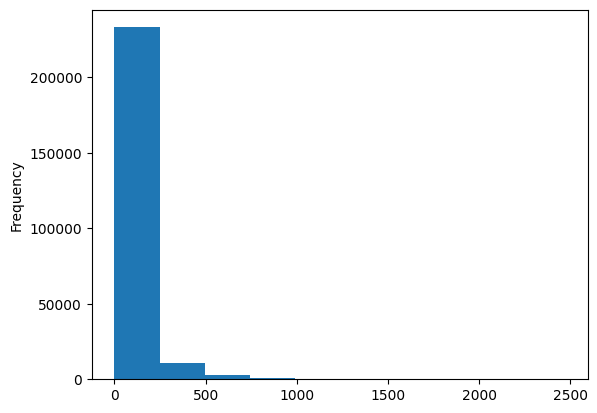

In [ ]:
dataset.word_count.plot(kind='hist')

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stemmer = PorterStemmer()
dataset['text'] = dataset['text'].map(lambda x: " ".join([stemmer.stem(word) for word in x.split() if word.lower() not in stop_words]))

In [ ]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split()))

<Axes: ylabel='Frequency'>

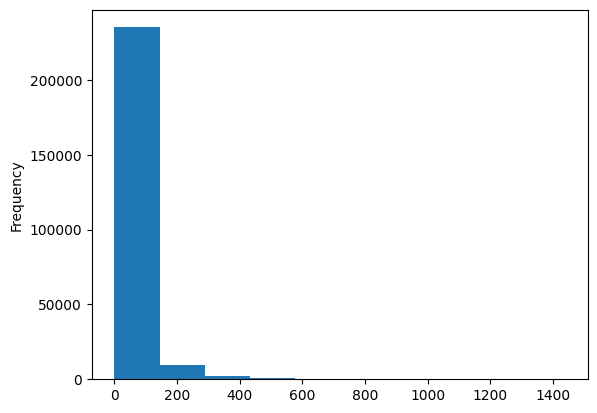

In [ ]:
dataset.word_count.plot(kind='hist')

In [ ]:
filtered_dataset = dataset[dataset['word_count'].apply((lambda x: x<=100))]

<Axes: ylabel='Frequency'>

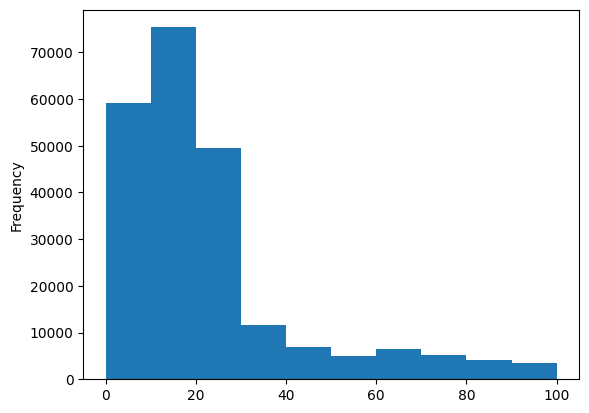

In [ ]:
filtered_dataset.word_count.plot(kind="hist")

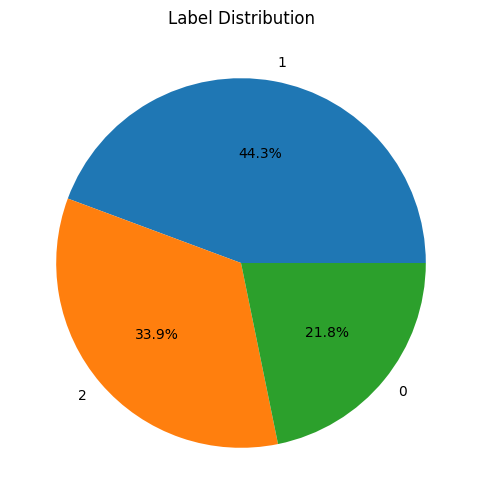

In [ ]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title("Label Distribution")
plt.show()


In [ ]:
filtered_dataset.shape

(226561, 3)

In [ ]:
word_to_idx = {
    word : idx for idx, word in enumerate(filtered_dataset["text"].str.split().explode().unique())
}

In [ ]:
word_to_idx["<UNK>"] = len(word_to_idx)
word_to_idx["<PAD>"] = len(word_to_idx)


In [ ]:
len(word_to_idx)

148747

In [ ]:
text = [
    "Hello G",
    "I am Ali Abbas",
    "Who are you"
]

In [ ]:
# import copy
# def preprocess_sentences(text, word_to_idx, unknown_word_token="<UNK>", pad_token = "<PAD>"):
#     sentences = text
#     for i, sentence in enumerate(sentences):
#         sentence_words = sentence.lower().strip().split()
#         if(len(sentence_words)>100):
#           sentence_words = sentence_words[:101]
#         if(len(sentence_words)<100):
#           sentence_words += [pad_token] * (100 - len(sentence_words))
#         sentence_indices = [
#             word_to_idx.get(word, word_to_idx.get(unknown_word_token))
#             for word in sentence_words
#         ]
#         sentences[i] = sentence_indices

#     return sentences

In [ ]:
import numpy as np
import itertools

def preprocess_dataframe(df, text_column, word_to_idx, unknown_word_token="<UNK>", pad_token="<PAD>", max_length=100):
    unknown_idx = word_to_idx.get(unknown_word_token, len(word_to_idx))
    pad_idx = word_to_idx.get(pad_token, len(word_to_idx) + 1)

    def process_sentence(sentence):
        sentence_words = str(sentence).lower().strip().split()  # Ensure it's a string
        sentence_indices = [word_to_idx.get(word, unknown_idx) for word in sentence_words]

        # Efficient truncation and padding
        return list(itertools.islice(sentence_indices, max_length)) + [pad_idx] * max(0, max_length - len(sentence_indices))

    df[text_column] = df[text_column].apply(process_sentence)
    return df  # Return modified DataFrame

In [ ]:
vectorized_dataset = preprocess_dataframe(filtered_dataset, text_column="text", word_to_idx=word_to_idx, unknown_word_token="<UNK>")

<ipython-input-29-aa8f6aa371ca>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].apply(process_sentence)


In [ ]:
vectorized_dataset.drop('word_count', axis=1, inplace=True)

<ipython-input-31-5cb13d09e8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectorized_dataset.drop('word_count', axis=1, inplace=True)


In [ ]:
vectorized_dataset

,text,label
0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0
1,"[20, 21, 22, 23, 24, 0, 148746, 148746, 148746...",2
2,"[25, 24, 0, 26, 27, 28, 29, 30, 31, 0, 32, 0, ...",1
3,"[34, 35, 36, 37, 38, 0, 39, 40, 41, 42, 43, 44...",1
4,"[50, 51, 52, 53, 54, 55, 56, 57, 0, 58, 148746...",1
...,...,...
248064,"[13601, 5449, 185, 476, 702, 114, 104, 240, 14...",1
248065,"[13, 4891, 676, 39258, 2295, 39258, 148746, 14...",1
248066,"[383, 228, 657, 185, 510, 3732, 969, 2686, 657...",1
248067,"[98730, 39258, 676, 148746, 148746, 148746, 14...",1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_dataset['text'].values, vectorized_dataset['label'].values, test_size=0.2, stratify=vectorized_dataset['label'].values)

In [ ]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_tensor = torch.tensor(self.texts[idx], dtype=torch.long)
        label_tensor = torch.tensor(self.labels[idx], dtype=torch.long)
        return text_tensor, label_tensor

In [ ]:
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, hidden_dim=256, num_classes=3, num_layers=2, dropout=0.3):
        super(LSTMClassifier, self).__init__()

        self.embedding = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim, padding_idx=0)

        self.lstm = nn.LSTM(input_size=embed_dim, hidden_size=hidden_dim, num_layers=num_layers,
                            batch_first=True, dropout=dropout, bidirectional=True)

        self.fc = nn.Linear(hidden_dim * 2, num_classes)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return self.softmax(x)

In [ ]:
vocab_size = len(word_to_idx)
num_classes = len(set(y_train))
model = LSTMClassifier(vocab_size=vocab_size, num_classes=num_classes)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model)

LSTMClassifier(
  (embedding): Embedding(148747, 128, padding_idx=0)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=512, out_features=3, bias=True)
  (softmax): LogSoftmax(dim=1)
)


In [ ]:
def get_accuracy_metric(num_classes, device):
    return Accuracy(task="multiclass", num_classes=num_classes).to(device)

def train(model, train_loader, optimizer, criterion, device, num_epochs=5, num_classes=3):
    model.train()
    accuracy_metric = get_accuracy_metric(num_classes, device)

    for epoch in range(num_epochs):
        total_loss = 0
        accuracy_metric.reset()

        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(texts)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            accuracy_metric.update(preds, labels)

        avg_loss = total_loss / len(train_loader)
        epoch_accuracy = accuracy_metric.compute().item() * 100
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

# Evaluation Function
def evaluate(model, test_loader, device, num_classes=3):
    model.eval()
    accuracy_metric = get_accuracy_metric(num_classes, device)
    accuracy_metric.reset()

    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)

            preds = torch.argmax(outputs, dim=1)
            accuracy_metric.update(preds, labels)

    final_accuracy = accuracy_metric.compute().item() * 100
    print(f"Test Accuracy: {final_accuracy:.2f}%")


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10
train(model, train_loader, optimizer, criterion, device, num_epochs)

Epoch [1/10], Loss: 0.6554, Accuracy: 70.59%
Epoch [2/10], Loss: 0.3937, Accuracy: 85.34%
Epoch [3/10], Loss: 0.3169, Accuracy: 88.42%
Epoch [4/10], Loss: 0.2465, Accuracy: 91.30%
Epoch [5/10], Loss: 0.1851, Accuracy: 93.60%
Epoch [6/10], Loss: 0.1370, Accuracy: 95.43%
Epoch [7/10], Loss: 0.1071, Accuracy: 96.51%
Epoch [8/10], Loss: 0.0851, Accuracy: 97.25%
Epoch [9/10], Loss: 0.0714, Accuracy: 97.70%
Epoch [10/10], Loss: 0.0601, Accuracy: 98.07%


In [ ]:
evaluate(model, test_loader, device)

Test Accuracy: 82.79%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to /content/drive/My Drive/lstm_model.pth


In [ ]:
save_path = "/content/drive/My Drive/lstm_model.pth"

In [ ]:
load_model = LSTMClassifier(vocab_size=vocab_size, num_classes=num_classes)
load_model.to(device)

In [ ]:
model.load_state_dict(torch.load(save_path, map_location=device))

In [ ]:
comments = [
    "I absolutely loved this product! It exceeded all my expectations!",
        "The customer service was amazing. I’m so happy with my purchase!",
        "This was a fantastic experience. I would definitely recommend it to my friends.",
        "Such a great workout routine, I’m already feeling the results!",
        "I’m really impressed by how easy and quick everything was. Highly recommend!",
    "I’m very disappointed with this purchase. It didn’t work as advertised.",
        "The quality of the product is poor and it broke after a few days.",
        "Terrible experience! The service was slow, and my issue wasn’t resolved.",
        "I don’t think this was worth the money at all. Very unsatisfied.",
        "The app keeps crashing and is impossible to use, total waste of time.",
    "The product is fine, but I’ve seen better options out there.",
        "The service was okay, not great, but not bad either.",
        "It works as expected, though I was hoping for something more.",
        "This is an average experience. Nothing extraordinary, but it gets the job done.",
        "I don’t have strong feelings one way or another about this."
]

In [ ]:
import itertools
import numpy as np

def preprocess_comments(comments, word_to_idx, unknown_word_token="<UNK>", pad_token="<PAD>", max_length=100):
    unknown_idx = word_to_idx.get(unknown_word_token, len(word_to_idx))
    pad_idx = word_to_idx.get(pad_token, len(word_to_idx) + 1)

    def process_sentence(sentence):
        sentence_words = str(sentence).lower().strip().split()
        sentence_indices = [word_to_idx.get(word, unknown_idx) for word in sentence_words]

        return list(itertools.islice(sentence_indices, max_length)) + [pad_idx] * max(0, max_length - len(sentence_indices))

    return np.array([process_sentence(comment) for comment in comments], dtype=np.int32)


In [ ]:
def infer(model, comments, word_to_idx, device, unknown_word_token="<UNK>", pad_token="<PAD>", max_length=100):
    model.eval()

    inputs = preprocess_comments(comments, word_to_idx, unknown_word_token, pad_token, max_length)

    inputs_tensor = torch.tensor(inputs, dtype=torch.long).to(device)

    with torch.no_grad():
        outputs = model(inputs_tensor)

    return outputs